In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
%load_ext Cython

In [ ]:
def im_show(pic,titulo = "",ip = "nearest"):
    fig, axs = plt.subplots(1, figsize=(30,5))
    axs.imshow(pic,cmap='gray')
    axs.set_xlabel(titulo)
    plt.show()
    return

def grises(pic):
  height=pic.shape[0]
  width=pic.shape[1]
  channels=1
  if pic.ndim==3:
    channels=pic.shape[2]
  if channels==1:
    return pic
  factor=np.array([0.24,0.65,0.11])
  if channels==4:
    factor=np.array([0.24,0.65,0.11,1])
  pic2=np.dot(pic.astype(dtype=np.float),factor)
  return pic2.astype(dtype=np.uint8)

def grises2(img,color = 0):
  alto = img.shape[0]
  ancho = img.shape[1]
  canal = np.zeros((alto,ancho))
  for i in range(alto):
    for j in range(ancho):
      canal[i][j] = img[i][j][color]
  return canal.astype(dtype=np.uint8)

def noise(img, salt, pepper):
    height=img.shape[0]
    width=img.shape[1]  
    img_r=np.asarray(img.copy(),order="C")
    hw=height*width
    if salt>0 and salt<=1:
        npixels=int(float(hw)*salt)
        for i in range(npixels):
            x = np.random.randint(0,width,1)
            y = np.random.randint(0,height,1)
            img_r[y[0],x[0]]=255
    if pepper>0 and pepper<=1:
        npixels=int(float(hw)*pepper)
        for i in range(npixels):
            x = np.random.randint(0,width,1)
            y = np.random.randint(0,height,1)
            img_r[y[0],x[0]]=0
    return img_r

def unificar(lista):
    return [[item] for sublista in lista for item in sublista]

In [ ]:
%%cython -a
import numpy as np
cimport cython
@cython.boundscheck(False) 
@cython.wraparound(False)

def morfologica_max_aprendizaje(x,y):
  M = np.zeros((y[0].shape[0],x[0].shape[0]))
  for i in range(M.shape[0]):
    for j in range(M.shape[1]):
      maximo = y[0][i][0] - x[0][j][0]
      for p in range(len(x)):
        if (y[p][i][0] - x[p][j][0]) > maximo :
          maximo = y[p][i][0] - x[p][j][0]
      M[i][j] = maximo
  return M

def morfologica_max_recuperacion(x,M,yE,etiqueta):
  y = np.zeros((M.shape[0],1))
  for i in range(M.shape[0]):
    minimo = M[i][0] + x[0][0]
    for j in range(x.shape[0]):
      if (M[i][j] + x[j][0]) < minimo :
        minimo = M[i][j] + x[j][0]
    y[i][0] = minimo
  print("y:",y)
  for indice in range(len(etiqueta)):
    if (y == yE[indice]).all():
      print("Es un ",etiqueta[indice].split(".")[0])
      return
  print("No encontrado")

def morfologica_min_aprendizaje(x,y):
  W = np.zeros((y[0].shape[0],x[0].shape[0]))
  for i in range(W.shape[0]):
    for j in range(W.shape[1]):
      minimo = y[0][i][0] - x[0][j][0]
      for p in range(len(x)):
        if (y[p][i][0] - x[p][j][0]) < minimo :
          minimo = y[p][i][0] - x[p][j][0]
      W[i][j] = minimo
  return W

def morfologica_min_recuperacion(x,W,yE,etiqueta):
  y = np.zeros((W.shape[0],1))
  for i in range(W.shape[0]):
    maximo = W[i][0] + x[0][0]
    for j in range(x.shape[0]):
      if (W[i][j] + x[j][0]) > maximo :
        maximo = W[i][j] + x[j][0]
    y[i][0] = maximo
  print("y:",y)
  for indice in range(len(etiqueta)):
    if (y == yE[indice]).all():
      print("Es un ",etiqueta[indice].split(".")[0])
      return
  print("No encontrado")


<h2>Aprendizaje</h2>

In [ ]:
pokemones = ["Charmander.bmp","Gengar.bmp","Mewtwo.bmp","Pikachu.bmp","Squirtle.bmp"]
y = [np.asarray([[1],[0],[0],[0],[0]]),np.asarray([[0],[1],[0],[0],[0]]),np.asarray([[0],[0],[1],[0],[0]]),np.asarray([[0],[0],[0],[1],[0]]),np.asarray([[0],[0],[0],[0],[1]])]
x = [np.asarray(unificar(grises2(np.asarray(Image.open(pokemon))).tolist())) for pokemon in pokemones]
#x = [np.asarray([[1],[0],[1],[0],[1]]),np.asarray([[1],[1],[0],[0],[1]]),np.asarray([[1],[0],[1],[1],[0]])]
#y = [np.asarray([[1],[0],[0]]),np.asarray([[0],[1],[0]]),np.asarray([[0],[0],[1]])]
M = morfologica_max_aprendizaje(x,y)
print("M:")
print(M)
W = morfologica_min_aprendizaje(x,y)
print("W:")
print(W)

M:
[[0. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
W:
[[ 0.  0.  0. ... -2.  0.  0.]
 [-1.  0.  0. ... -1.  0.  0.]
 [-1.  0.  0. ... -2.  0.  0.]
 [-1.  0.  0. ... -2.  0.  0.]
 [-1.  0.  0. ... -2.  0.  0.]]


<h2>Recuperacion</h2>



Ingrese 'min' o 'max:min
Ingrese el nombre de la imagen:Charmander.bmp
Ingrese la cantidad de ruido sal:0
Ingrese la cantidad de ruido primienta:0.7


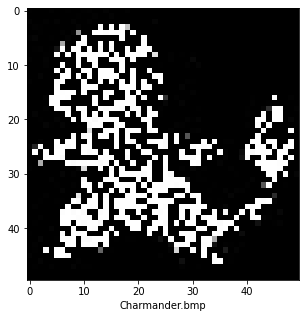

y: [[1.]
 [0.]
 [0.]
 [0.]
 [0.]]
Es un  Charmander


KeyboardInterrupt: ignored

In [ ]:
while True:
  tipo = input("\n\nIngrese 'min' o 'max:")
  pokemon = input("Ingrese el nombre de la imagen:")
  salt = float(input("Ingrese la cantidad de ruido sal:"))
  pepper = float(input("Ingrese la cantidad de ruido primienta:"))
  imagen = noise(grises2(np.asarray(Image.open(pokemon))),salt,pepper)
  im_show(imagen,pokemon)
  patron = np.asarray(unificar(imagen.tolist()))
  if tipo in "min":
    morfologica_min_recuperacion(patron,W,y,pokemones)
    pass
  else:
    morfologica_max_recuperacion(patron,M,y,pokemones)
    pass